In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [29]:
data = pd.read_csv('kc_house_data.csv')
data = sm.add_constant(data)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [30]:
X = data.drop(['price','date', 'id'], axis=1)
y = data['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
lm = sm.OLS(y, X)
model_baseline = lm.fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:44:07   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4404      2.270     48.661      0.000     105.992     114.889
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7877      2.253     31.415      0.000      66.371      75.204
sqft_basement    39.6601      2.647     14.985      0.000      34.473      44.848
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     3.55e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

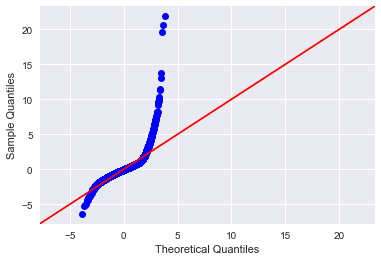

In [27]:
fig = sm.graphics.qqplot(model_baseline.resid, dist=stats.norm, line='45', fit=True)

In [37]:
print('RMSE for train set:', np.sqrt(mean_squared_error(y_train, model_baseline.predict(X_train))))
print('RMSE for test set:', np.sqrt(mean_squared_error(y_test, model_baseline.predict(X_test))))
print('MSE difference:', np.sqrt(mean_squared_error(y_train, model_baseline.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_baseline.predict(X_test))))
print('10 Cross Validation R^2 score for train:', cross_val_score(linreg, X_train, y_train, cv=10, scoring='r2').mean())
print('10 Cross Validation R^2 score for test:', cross_val_score(linreg, X_test, y_test, cv=10, scoring='r2').mean())

RMSE for train set: 198314.69151864786
RMSE for test set: 212177.2460014539
MSE difference: -13862.554482806037
10 Cross Validation R^2 score for train: 0.6989515276379131
10 Cross Validation R^2 score for test: 0.6950196377779578
